# r/Portugal activity during 2016

In [1]:
import pandas as pd
import time
from matplotlib.pylab import rcParams
import numpy as np
import matplotlib.cm as cm
from matplotlib.pyplot import figure, show, rc
%matplotlib inline
rcParams['figure.figsize'] = [8, 8]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")

In [16]:
df = pd.read_csv("/home/hypathia/Desktop/rPortugal_2016.csv", sep="\t")
df.head()

,url,title,author,num_comments,date,score,upvote_ratio
0,https://www.reddit.com/r/portugal/comments/5lc...,Onde encontrar episódios do Tom Sawyer em PT?,BroaxXx,6,1.483257e+09,5,0.78
1,https://www.reddit.com/r/portugal/comments/5lc...,[Serio] Valor das casas aumenta 4% ao ano até ...,filetemignone,5,1.483255e+09,8,0.75
2,https://www.reddit.com/r/portugal/comments/5lc...,Eu não recebo mensagem de Feliz Natal e Feliz ...,nksrfn-,17,1.483253e+09,5,0.86
3,https://www.reddit.com/r/HumansBeingBros/comme...,Português no /r/all (x-posta /r/HumanBeingBros),gonpires,8,1.483252e+09,40,0.94
4,https://www.reddit.com/r/portugal/comments/5lb...,A final do euro está neste momento a passar na...,Quillergs,7,1.483251e+09,7,0.73


In [17]:
df['date'] = df['date'].apply(lambda x: x-28000)
df['date'] = df['date'].apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))
df['date'] = pd.to_datetime(df['date'])

# Check if date is all set.
df['date'].head(3)

0   2017-01-01 00:05:16
1   2016-12-31 23:24:17
2   2016-12-31 22:53:24
Name: date, dtype: datetime64[ns]

### Hourly activity (nr. of total submissions) during 2016 in r/Portugal

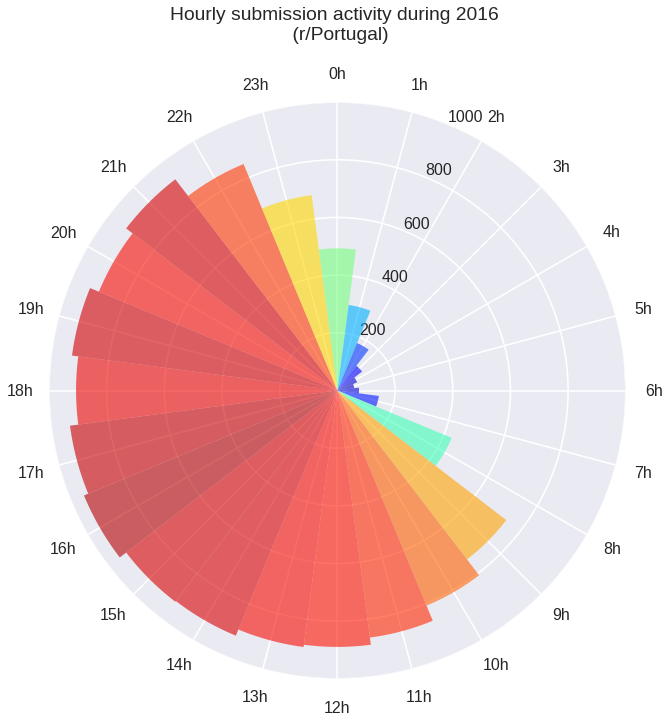

In [18]:
fig = figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

theta = np.arange(0.0, 2*np.pi, 2*np.pi/24)
radii = df.groupby(df["date"].dt.hour).size()

bars = ax.bar(theta, 
              radii, 
              width=np.pi/12, 
              bottom=0.0)
      
for r,bar in zip(radii, bars):
    bar.set_facecolor( cm.jet(r/1000.))
    bar.set_alpha(0.6)

ax.set_theta_direction(-1) 
ax.set_theta_offset(np.pi/2.0) 
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels([str(x)+"h" for x in range(24)])
ax.set_title("Hourly submission activity during 2016 \n (r/Portugal)", y=1.1)

show()

### Median nr. of comments, score and upvote ratio per submission hour during 2016 in r/Portugal

In [64]:
df.groupby(df["date"].dt.hour).median()

,num_comments,score,upvote_ratio
date,,,
0,10,5,0.740
1,11,6,0.760
2,12,5,0.755
3,13,6,0.750
4,14,8,0.800
5,17,6,0.800
6,12,7,0.780
7,15,10,0.810
8,9,7,0.730


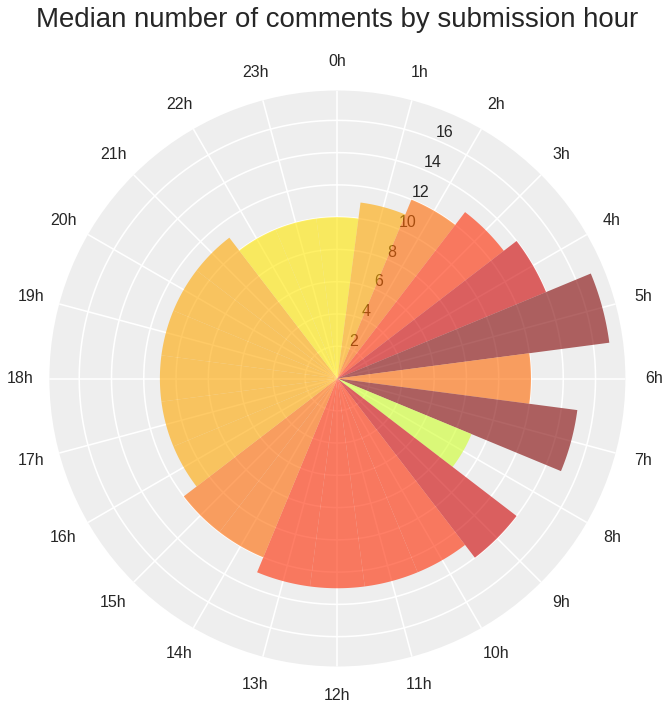

In [40]:
fig = figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

theta = np.arange(0.0, 2*np.pi, 2*np.pi/24)
radii = df.groupby(df["date"].dt.hour).median()['num_comments']

bars = ax.bar(theta, 
              radii, 
              width=np.pi/12, 
              bottom=0.0)
      
for r,bar in zip(radii, bars):
    bar.set_facecolor( cm.jet(r/15.))
    bar.set_alpha(0.6)

ax.set_theta_direction(-1) 
ax.set_theta_offset(np.pi/2.0) 
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels([str(x)+"h" for x in range(24)])
ax.set_title("Median number of comments by submission hour", y=1.1)

show()

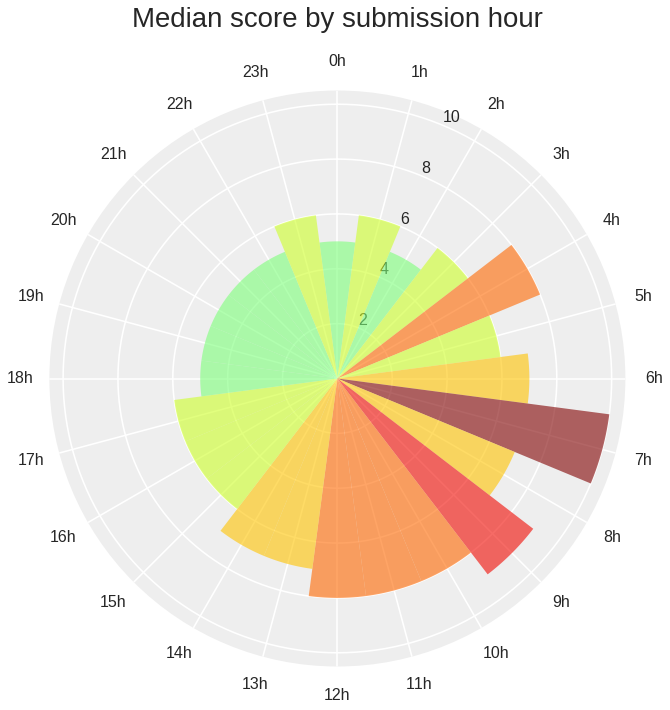

In [32]:
fig = figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

theta = np.arange(0.0, 2*np.pi, 2*np.pi/24)
radii = df.groupby(df["date"].dt.hour).median()['score']

bars = ax.bar(theta, 
              radii, 
              width=np.pi/12, 
              bottom=0.0)
      
for r,bar in zip(radii, bars):
    bar.set_facecolor( cm.jet(r/10.))
    bar.set_alpha(0.6)

ax.set_theta_direction(-1) 
ax.set_theta_offset(np.pi/2.0) 
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels([str(x)+"h" for x in range(24)])
ax.set_title("Median score by submission hour", y=1.1)

show()

## Sum of submission scores by day in r/Portugal during 2016

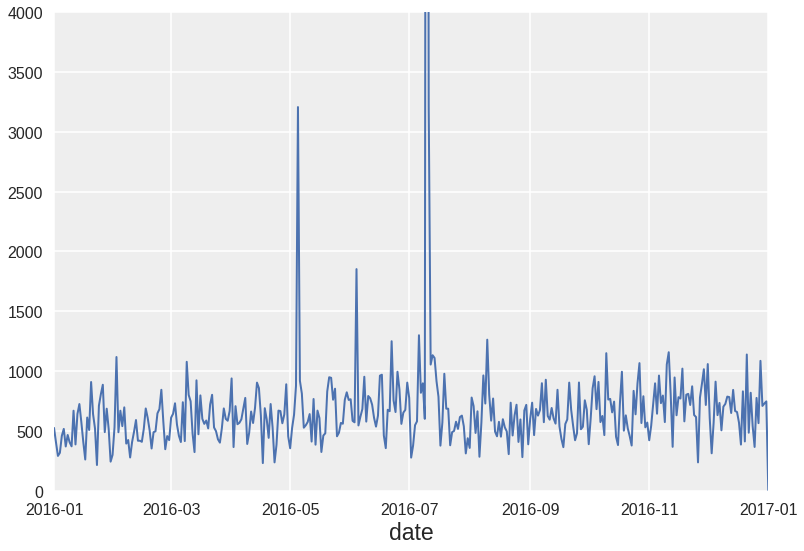

In [54]:
df.groupby(df['date'].dt.date).apply(lambda x: x['score'].sum()).plot(ylim=[0,4000])

### There are three peaks (in total score). Which submission(s) do these peaks refer to? 

In [74]:
import datetime

interval=[datetime.date(2016,5,1), datetime.date(2016, 8, 1)]
date_cond = np.logical_and(df['date'].dt.date > interval[0], df['date'].dt.date < interval[1])
peakdates = df[date_cond][['title', 'date', 'score']].sort_values('score', ascending=False)
peakdates

,title,date,score
7454,"Somos Campeões, vamos meter a nossa bandeira n...",2016-07-10 21:49:38,8791
10412,"Vipur. Se derem upvote neste post, vai aparece...",2016-05-05 22:03:07,903
9765,Não há impossíveis na vida.Nunca desistas.,2016-05-21 11:49:47,543
9725,Porto! My new drawing based of the most beauti...,2016-05-22 14:58:38,540
7447,PORTUGAL CARALHO!!!,2016-07-10 22:05:58,471
7457,"Respect, Ronaldo. E obrigado por tudo o que fi...",2016-07-10 21:15:16,454
10428,UPVOTEM - Para a história da Vipur chegar à Co...,2016-05-05 18:27:25,421
8788,Happy Portugal day from Toronto,2016-06-11 12:28:32,404
7456,EDER MASTER RAÇA,2016-07-10 21:32:16,357
8262,Cristiano Ronaldo atira microfone da CMtv para...,2016-06-22 09:08:44,350


In [86]:
print('Sum of scores, by date:')
peakdates.groupby(df['date'].dt.date).sum().sort_values(by = "score", 
                                                        ascending=False).head(10)

Sum of scores, by date:


,score
date,
2016-07-10,14649
2016-07-11,3208
2016-05-05,3207
2016-06-04,1852
2016-07-06,1299
2016-06-22,1249
2016-07-13,1132
2016-07-14,1109
2016-07-12,1054


In [96]:
df[df['date'].dt.date == datetime.date(2016, 6, 4)][['title', 'score', 'num_comments']].sort_values(by="score",
                                                                                                    ascending=False)

,title,score,num_comments
9145,Quando não moras perto de localidades com nome...,160,5
9101,"Camionista com sentido de humor. A1,Aveiras.",148,4
9156,"Quando gozam contigo, tu ris-te, perguntam-te ...",138,7
9134,Pessoal,112,76
9135,Quando não encontro nenhuma melhor vou...,91,5
9130,Quando quero fazer um bolo mas tenho...,90,3
9124,Estou um bocado perdido...,86,5
9122,He pá! Esta história das terrinhas com nomes p...,72,8
9144,Quando queres usar um prato mas ele está...,71,7
9099,"Quando queres participar, mas só tens um sinal...",60,0


In [105]:
sum(df[df['date'].dt.date == datetime.date(2016, 6, 4)]['title'].str.startswith("Quando"))

20

- In the 5th of May two submissions refering to Vipur, a company that sued a portuguese redditor that called out its agressive marketing and quackery, gained wide support by the community. These submissions pretty muched helped 5th of May to stand out with a total score of 3208.

- The second peak occured on the 4th of June. There wasn't any event in particular - some redditors start posting funny pictures with titles beginning with "Quando" that went viral (20 submissions in this trend) in that day and which prompted alot of upvotes. 

- Portugal won the Euros in the 10th of July of 2016, which refers to the third and biggest peak: a total score of 14649. The virality of this event also leaked into the 11th of July, with a total score of 3208.


## Number of submissions by day in r/Portugal during 2016

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=True,win_type=bartlett).mean()


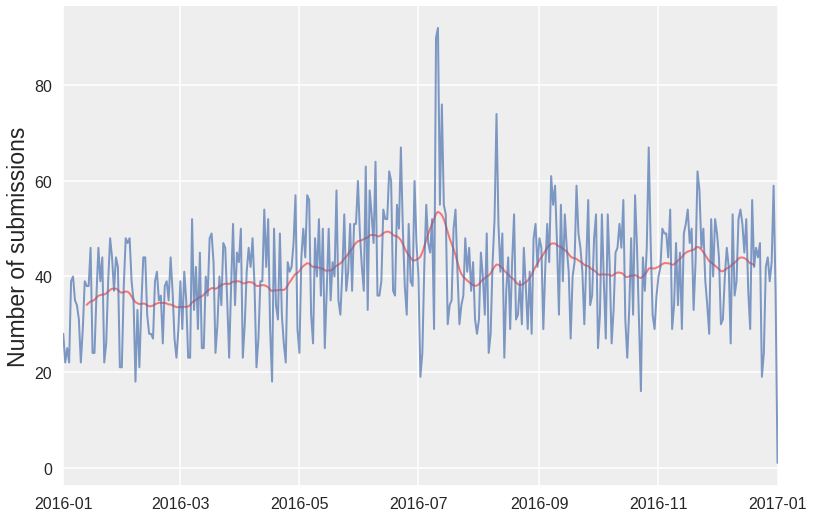

In [72]:
annualSubm = df.groupby(df['date'].dt.date).size()


subm_movavg = pd.rolling_mean(annualSubm,
                              window = 25,
                              win_type = 'bartlett',
                              center=True)


plt.plot(subm_movavg, color='red', alpha=.5)

ax = annualSubm.plot(alpha=.7)
ax.set_xlabel("")
ax.set_ylabel("Number of submissions", fontsize=23)

The number of submissions was higher during the summer, perhaps because of the Euro - where it peaked with Portugals victory over France on the 10th of July. It returned to baseline after July, with some small peaks in September and December.

There seems to be a wave-pattern on the number of submissions. I speculate this is because there is some difference in submission number between working days and weekends. I'll check it now.

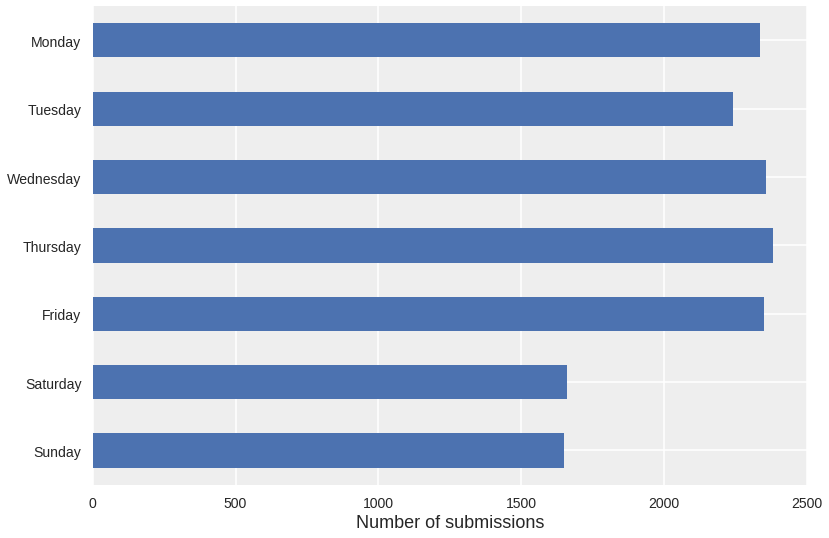

In [110]:
weekday = df.groupby(df['date'].dt.weekday).size()
weekday.index = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = weekday.plot(kind="barh", fontsize=14)
plt.xlabel("Number of submissions", fontsize=18)
ax.invert_yaxis()

It appears redditors submit way less during the weekend, which explains the oscillatory nature of the submissions per day in the plot above. 

# To do 

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=True,win_type=bartlett).mean()


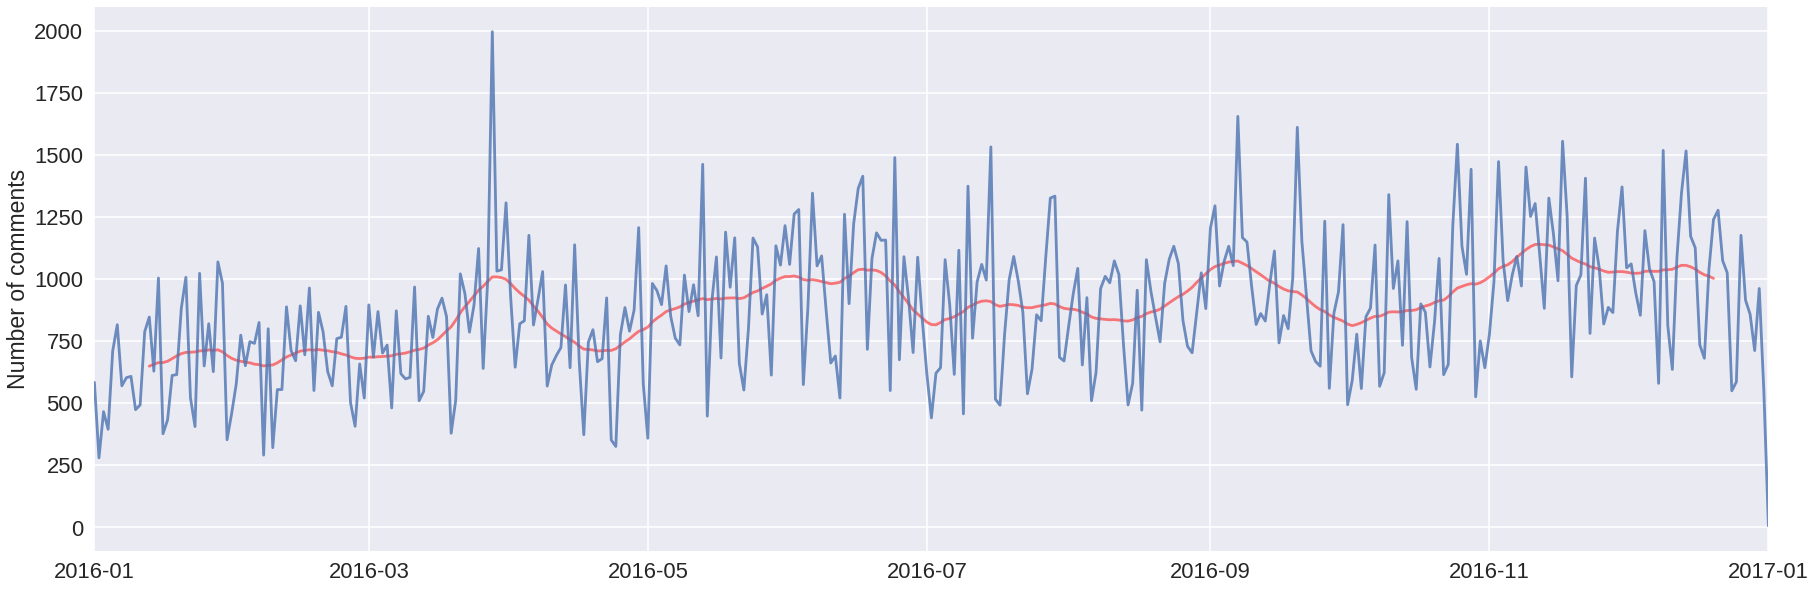

In [324]:
annualNumcom = df.groupby(df['date'].dt.date).apply(lambda x: x['num_comments'].sum())

numcom_movag = pd.rolling_mean(annualNumcom,
                              window = 25,
                              win_type = 'bartlett',
                              center=True)

plt.plot(numcom_movag, color='red', alpha=.5)

ax = annualNumcom.plot(figsize=(30,10),
                       alpha=.8,
                       fontsize=22)
ax.set_xlabel("")
ax.set_ylabel("Number of comments", fontsize=23)

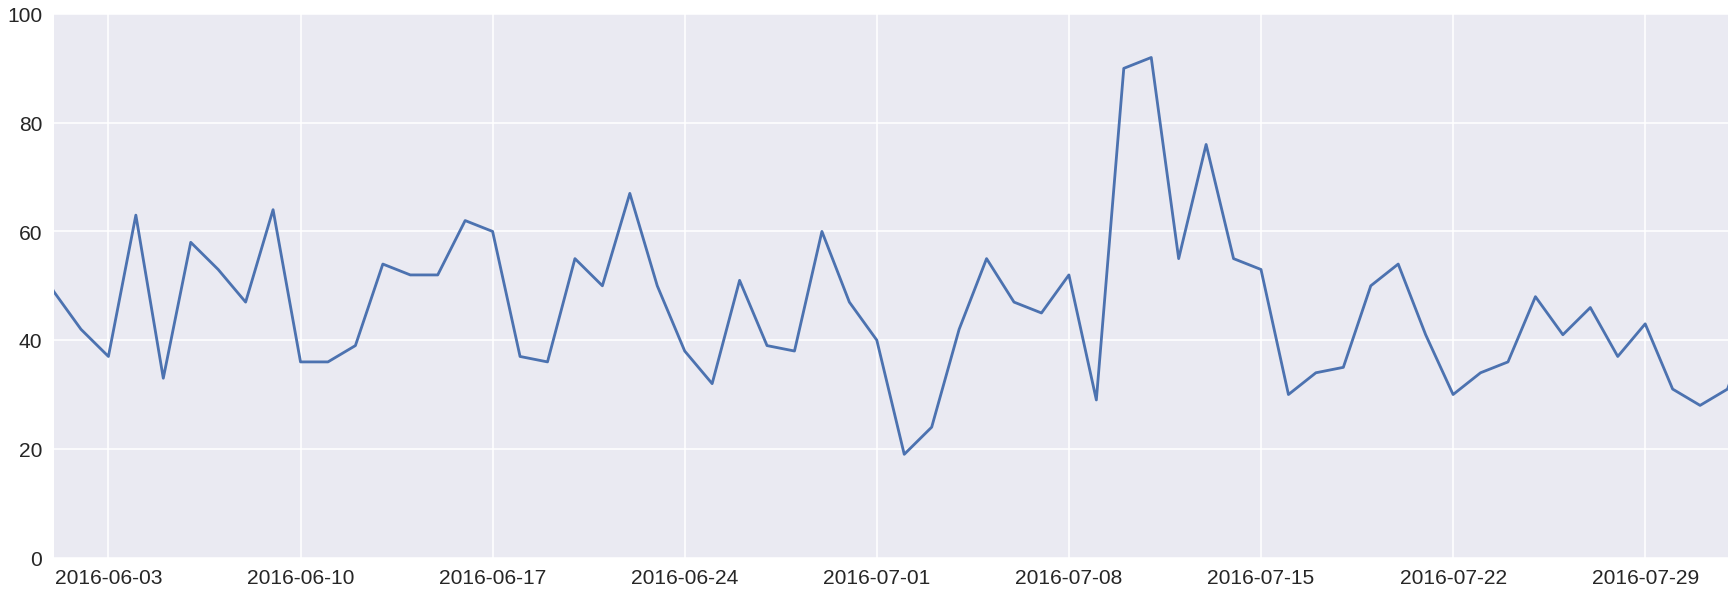

In [301]:
ax = annualSubm.plot(figsize=(30,10),
                     fontsize=21,
                     ylim =[0, 100],
                     xlim = [pd.Timestamp('2016-06-01'),pd.Timestamp('2016-08-01')])
ax.set_xlabel("")

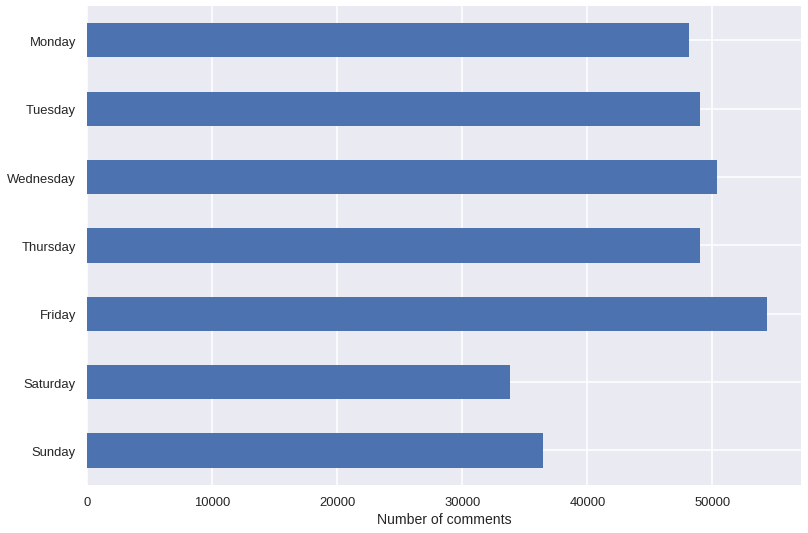

In [316]:
weekday = df.groupby(df['date'].dt.weekday).apply(lambda x: x['num_comments'].sum())
weekday.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = weekday.plot(kind="barh", fontsize=13)
ax.set_xlabel("Number of comments", fontsize=14)
ax.invert_yaxis()

In [31]:
## This chunk is only relevant for Jupyter Notebook aesthetics.
from pylab import rcParams
import json
s = json.load( open("/home/hypathia/bmh_matplotlibrc.json") ) 
rcParams.update(s)

from IPython.core.display import HTML
def css_styling():
    styles = open("/home/hypathia/custom.css", "r").read() 
    return HTML(styles)
css_styling()